<font size=6>Trata de personas en la República Argentina: Un análisis integral de los datos</font>

<h1>Tabla de contenidos</h1>

<ul style="list-style-type:none;">
<li>a. Introducción y objetivos</li>
<li>b. Metodología</li>
<li>c. Resultados</li>
    <ul style="list-style-type:none;"><li>1. Información temporal y geográfica</li>
        <ul style="list-style-type:none;"><li>1.1. Denuncias por año</li>
            <li>1.2. Denuncias por mes</li>
            <li>1.3. Denuncias por provincia</li>
            <li>1.4. Denuncias por provincia ajustadas por población</li>
            <li>1.5. Denuncias por ciudad</li></ul>
        <li>2. Caracterización de victimas, denunciantes y denunciados</li>
        <ul style="list-style-type:none;"><li>2.1. Víctimas</li>
            <li>2.2. Llamantes/Denunciantes</li>
            <li>2.3. Denunciados</li></ul>
        <li>3. Modalidades de explotación, derivaciones judiciales</li></ul>
        
    
<li>d. Discusión </li>
<li>e. Conclusión, sugerencias</li>
</ul><

<h1>Introducción y Objetivos</h1>

En el siglo XXI predomina la idea de que la esclavitud ya no existe, de que la posesión de personas fue erradicada por los estados y ya el sistema legal no tolera tal cosa. Sin embargo pueden darse formas más modernas de esclavitud que si bien no son llamadas así formalmente, existen mecanismos de extorsión y de engaño que producen el comercio moderno de personas vulnerables. Éste documento va a analizar los datos existentes relevantes al tema, comenzando por las denuncias hechas mediante la línea 145 por trata de personas (2017,2018,2019). 

Al observar los datos disponibles al respecto en la plataforma de datos abiertos de la Nación es notable no sólo una grandísima falta en la cantidad de datos sino también en la calidad de los datos. PROTEX (Procuraduría de Trata y Explotación de Personas) es el organismo dependiente del Ministerio Público Fiscal a quien se delegan las denuncias realizadas para analizarlas y tomar medidas al respecto, éste organismo realiza informes al respecto que están disponibles en su página web. Dichos informes parecen ser inconsistentes con los números expuestos en los archivos publicados en la plataforma. El primer informe donde PROTEX analiza los datos de llamadas fue realizado en 2015 y los reportes hechos desde entonces parecen no coincidir con los datos analizados en el presente reporte. La línea 145 fue lanzada en el año 2012 y desde entonces recopila datos que en su mayoría no son de conocimiento público. Todas estas observaciones llaman poderosamente la atención y son preocupantes. Este reporte no busca señalar a nadie en específico, sino que llevará a cabo un análisis de los datos disponibles al público para evidenciar la falta de compromiso y profesionalidad de los organismos públicos encargados.

<h1>Metodología</h1>

<font size = 5>Importación de datos</font>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

datos17 = pd.read_csv("l145_denuncias_2017\lucha-contra-la-trata-de-personas-denuncias-linea-145-201712.csv")

docs18 = []
docs19 = []
for k in range(12):
    if (k<9):
        docs18.append(pd.read_csv("l145_denuncias_2018\d20180" + str(k+1) + ".csv"))
        docs19.append(pd.read_csv("l145_denuncias_2019\lucha-contra-la-trata-de-personas-denuncias-linea-145-20190"+ str(k+1) + ".csv") )
    else:
        docs18.append(pd.read_csv("l145_denuncias_2018\d2018" + str(k+1) + ".csv"))
        docs19.append(pd.read_csv("l145_denuncias_2019\lucha-contra-la-trata-de-personas-denuncias-linea-145-2019"+ str(k+1) + ".csv") )

datos18 = pd.concat(docs18,sort=False)
datos19 = pd.concat(docs19,sort=False)
datos1819 = pd.concat([datos18,datos19],sort=False)#dadas ciertas similitudes entre éstos dos años defino un dataset con las denuncias del 2018-2019
datos_todos = pd.concat([datos17,datos18,datos19], sort=False)

<h1>Resultados</h1>

<h1>1. Información temporal y geográfica</h1>

<h2>1.1. Denuncias por año</h2>

In [2]:
denuncias_año = pd.DataFrame({"denuncias":[len(datos17.index),len(datos18.index),len(datos19.index)]}, index=[2017,2018,2019])
denuncias_año.rename_axis("año", axis=0)


,denuncias
año,
2017,2835
2018,2074
2019,1917


<h2>1.2. Denuncias por mes</h2>

In [3]:
denuncias_mes_17 = list(range(0,12,1))
datos17["denuncia_fecha"] = pd.to_datetime(datos17["denuncia_fecha"].sort_values().values)

for k in datos17["denuncia_fecha"]:
    denuncias_mes_17[k.month-1] = denuncias_mes_17[k.month-1]+1
denuncias_mes_17_df = pd.DataFrame(denuncias_mes_17, index = range(1,13,1)).rename_axis("mes, 2017",axis="rows").rename_axis(2017,axis="columns")
denuncias_mes_18 = []
for k in range(0,12,1):
    denuncias_mes_18.append(docs18[k]["denuncia_fecha"].value_counts().sum())
denuncias_mes_18
denuncias_mes_18_df = pd.DataFrame(denuncias_mes_18, index = range(1,13,1)).rename_axis("mes",axis="rows").rename_axis(2018,axis="columns")
denuncias_mes_19 = []
for k in range(0,12,1):
    denuncias_mes_19.append(docs19[k]["denuncia_fecha"].value_counts().sum())
denuncias_mes_19
denuncias_mes_19_df = pd.DataFrame(denuncias_mes_19, index = range(1,13,1)).rename_axis("mes",axis="rows").rename_axis(2019,axis="columns")


<h4>1.2.1. Denuncias por mes, año 2017</h4>

Text(0, 0.5, 'Número de denuncias')

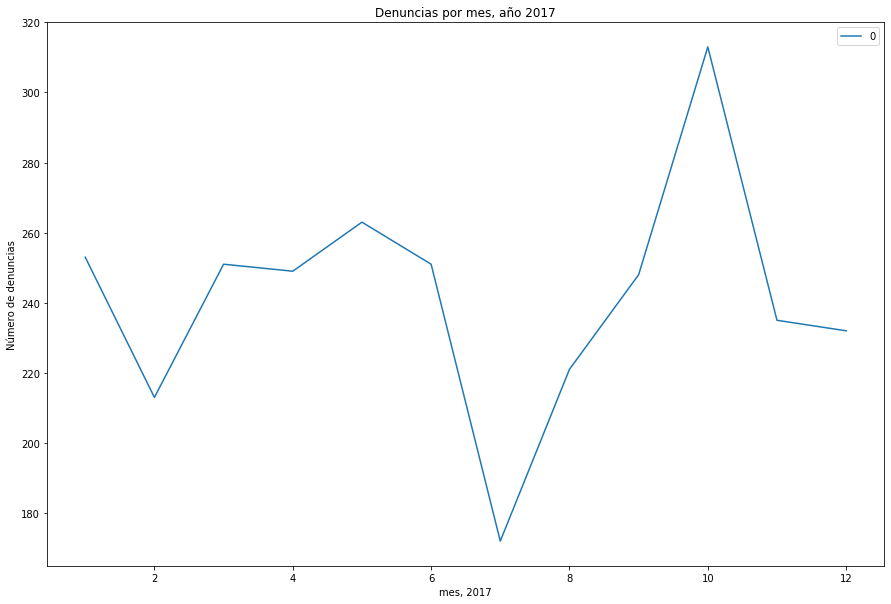

In [4]:
plt.figure(figsize=(15,10))
p121 = sns.lineplot(data=denuncias_mes_17_df)
plt.title("Denuncias por mes, año 2017")
plt.ylabel("Número de denuncias")


<h4>1.2.2. Denuncias por mes, año 2018</h4>

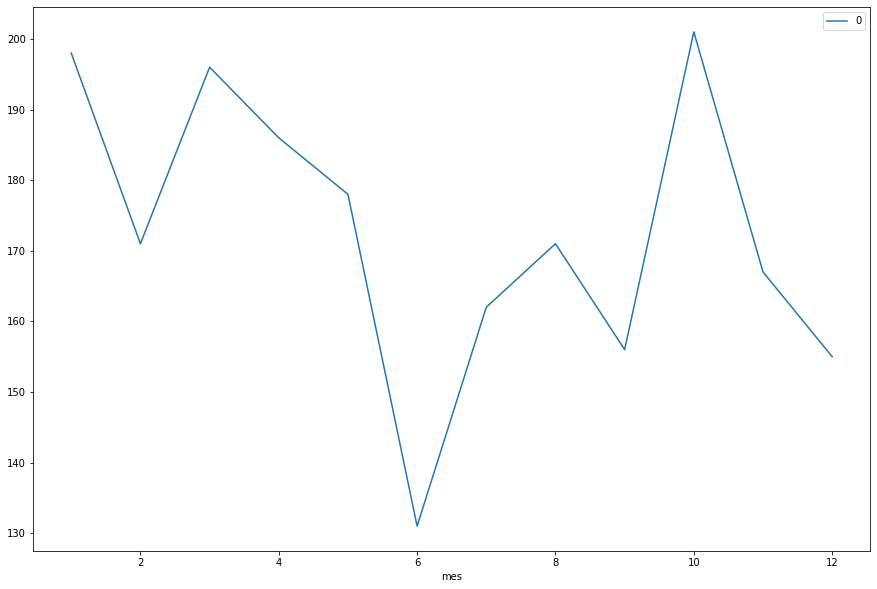

In [5]:

plt.figure(figsize=(15,10))
p122 = sns.lineplot(data=denuncias_mes_18_df)

<h4>1.2.3. Denuncias por mes, año 2019</h4>

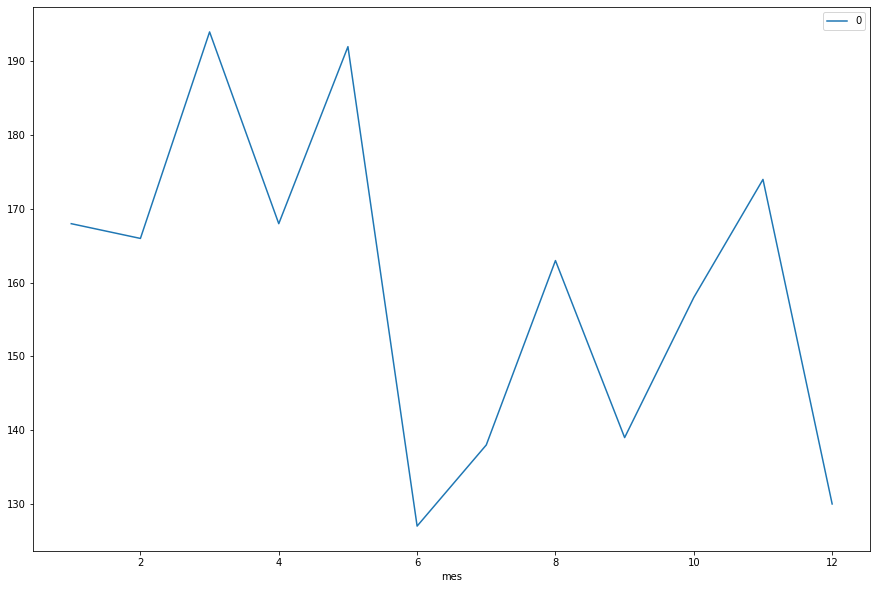

In [6]:

plt.figure(figsize=(15,10))
p123 = sns.lineplot(data=denuncias_mes_19_df)

<h4>1.2.4. Comparación</h4>

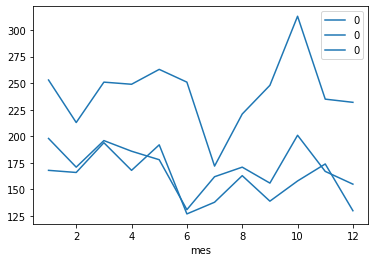

In [7]:
sns.lineplot(data=denuncias_mes_17_df)
sns.lineplot(data=denuncias_mes_18_df)
sns.lineplot(data=denuncias_mes_19_df)
#rename axis

Observación: entre el mes 5 y 7 de cada año se ve una fuerte caída en el número de denuncias, con un mínimo seguido de un fuerte repunte inmediato. 

<h4>1.2.5. Denuncias por mes a lo largo de todos los años</h4>

Text(0.5, 0, 'Fecha')

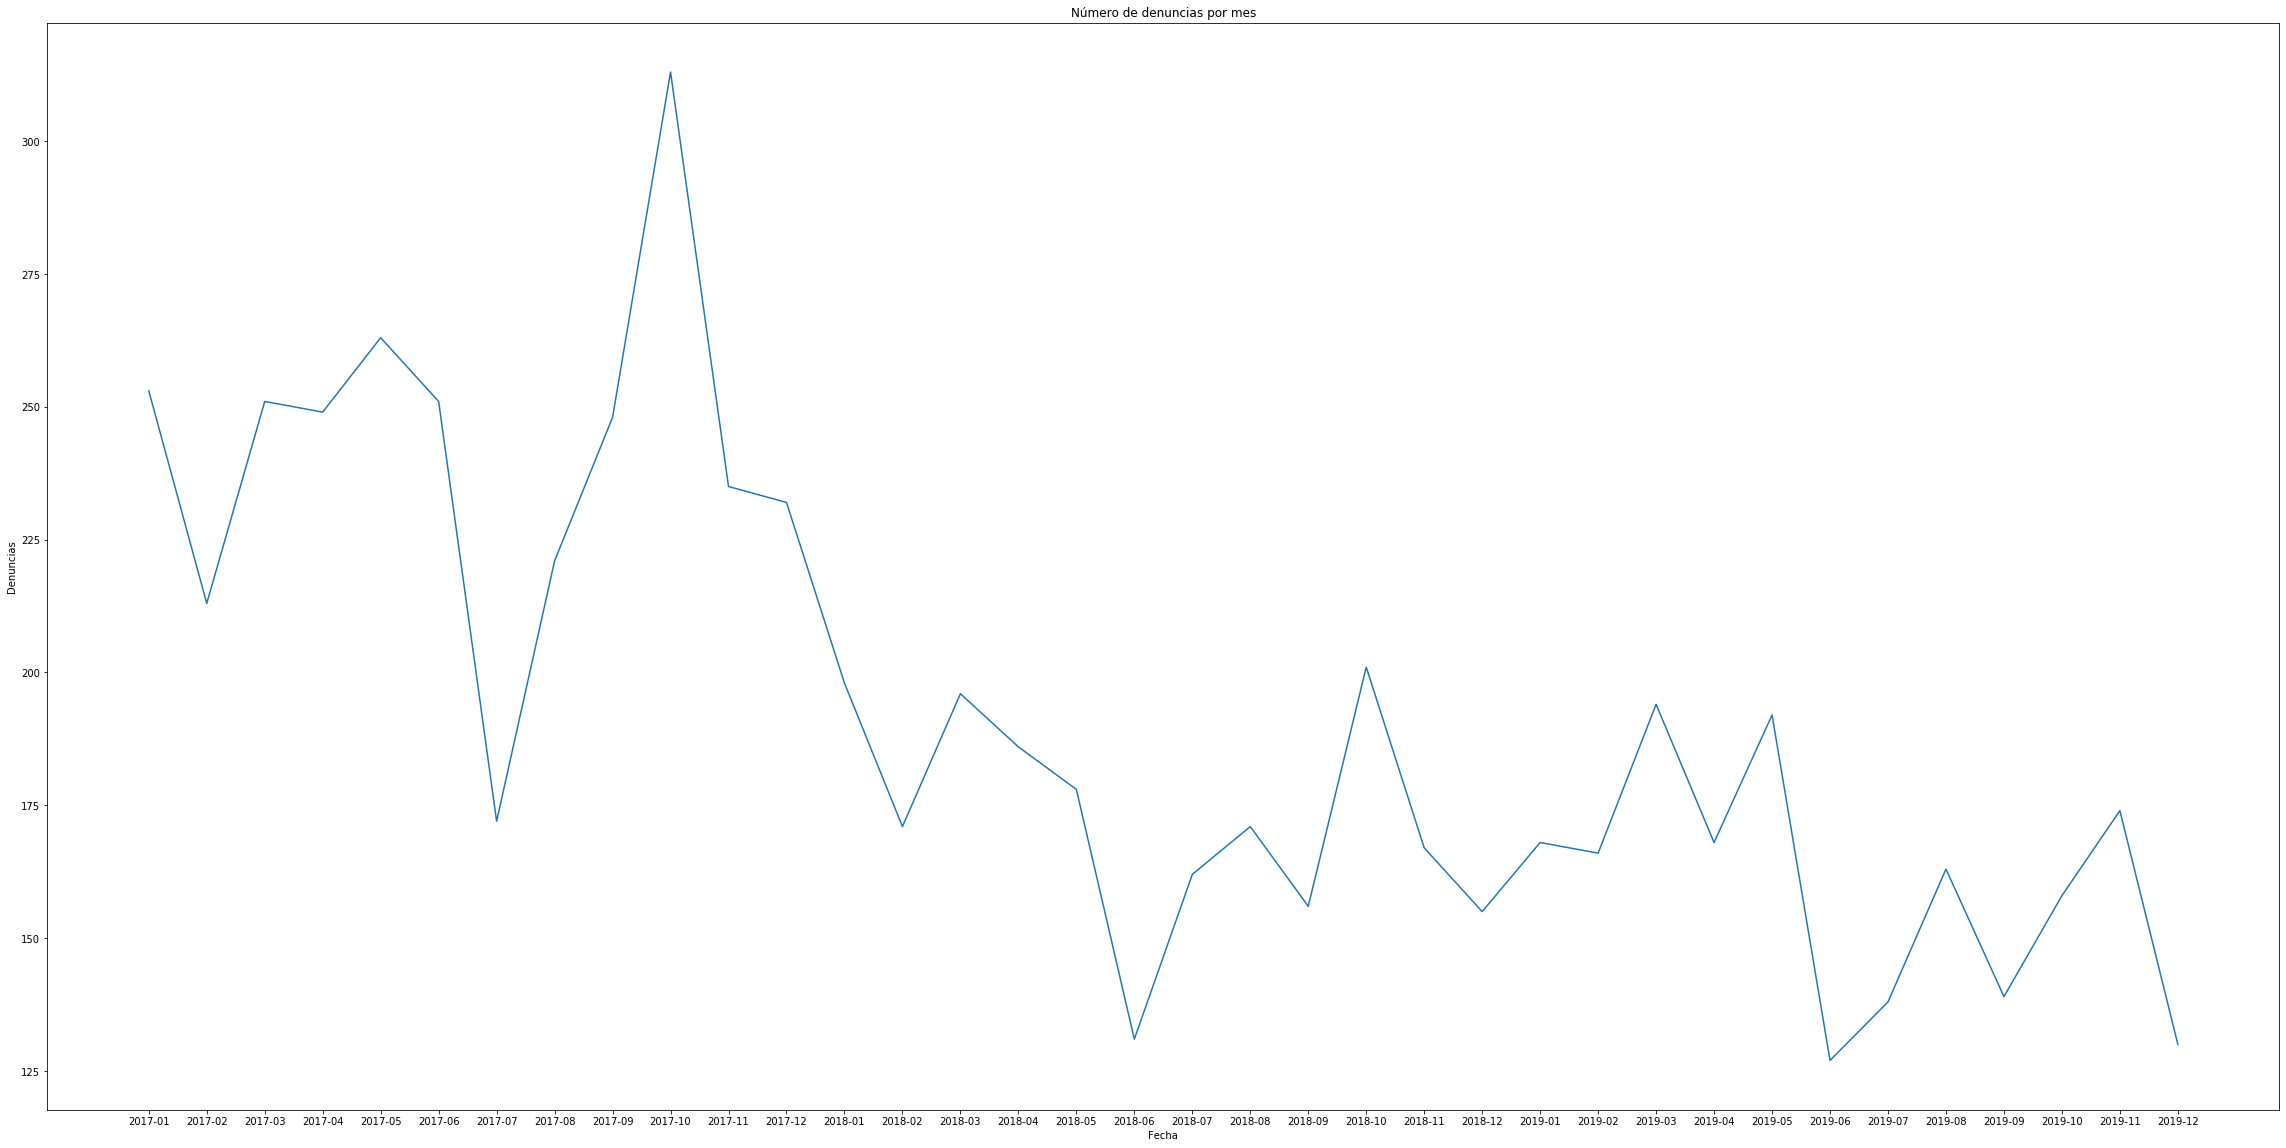

In [8]:
meses = []

def func(anio):
    for k in range(1,13,1):
        if (k<10):
            meses.append( str(anio) +"-0" + str(k))
        else:
            meses.append(str(anio) + "-" + str(k))
    return meses
        
func(2017)
func(2018)
func(2019)

meses
denuncias_meses = pd.Series(denuncias_mes_17+denuncias_mes_18+denuncias_mes_19, index=meses)
len(denuncias_meses)

plt.figure(figsize=(40,20))
sns.lineplot(data=denuncias_meses)
plt.title("Número de denuncias por mes")
plt.ylabel("Denuncias")
plt.xlabel("Fecha")

In [9]:
pd.Series(denuncias_mes_17).mean()
pd.Series(denuncias_mes_18).mean()
pd.Series(denuncias_mes_19).mean()


159.75

<h1>1.3. Denuncias por provincia</h1>

In [10]:

datos17["hecho_provincia"] = datos17["hecho_provincia"].fillna("No Aplica").replace(["Unknown","No aplica"],["No Aplica","No Aplica"])
#Primero con las provincias...
datos17 = datos17.replace(["Mendoza ","SALTA"], ["Mendoza","Salta"])
np.sort(pd.unique(datos17["hecho_provincia"].values))


array(['Buenos Aires', 'Caba', 'Catamarca', 'Chaco', 'Chubut',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'No Aplica', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tierra del Fuego', 'Tucumán'], dtype=object)

In [11]:
porProvincia = datos17["hecho_provincia"].value_counts().sort_values(ascending=False)
#voy a limpiar los casos de denuncias donde el hecho es en paises extranjeros

porProvincia_soloArg = porProvincia[porProvincia.index!="No Aplica"]


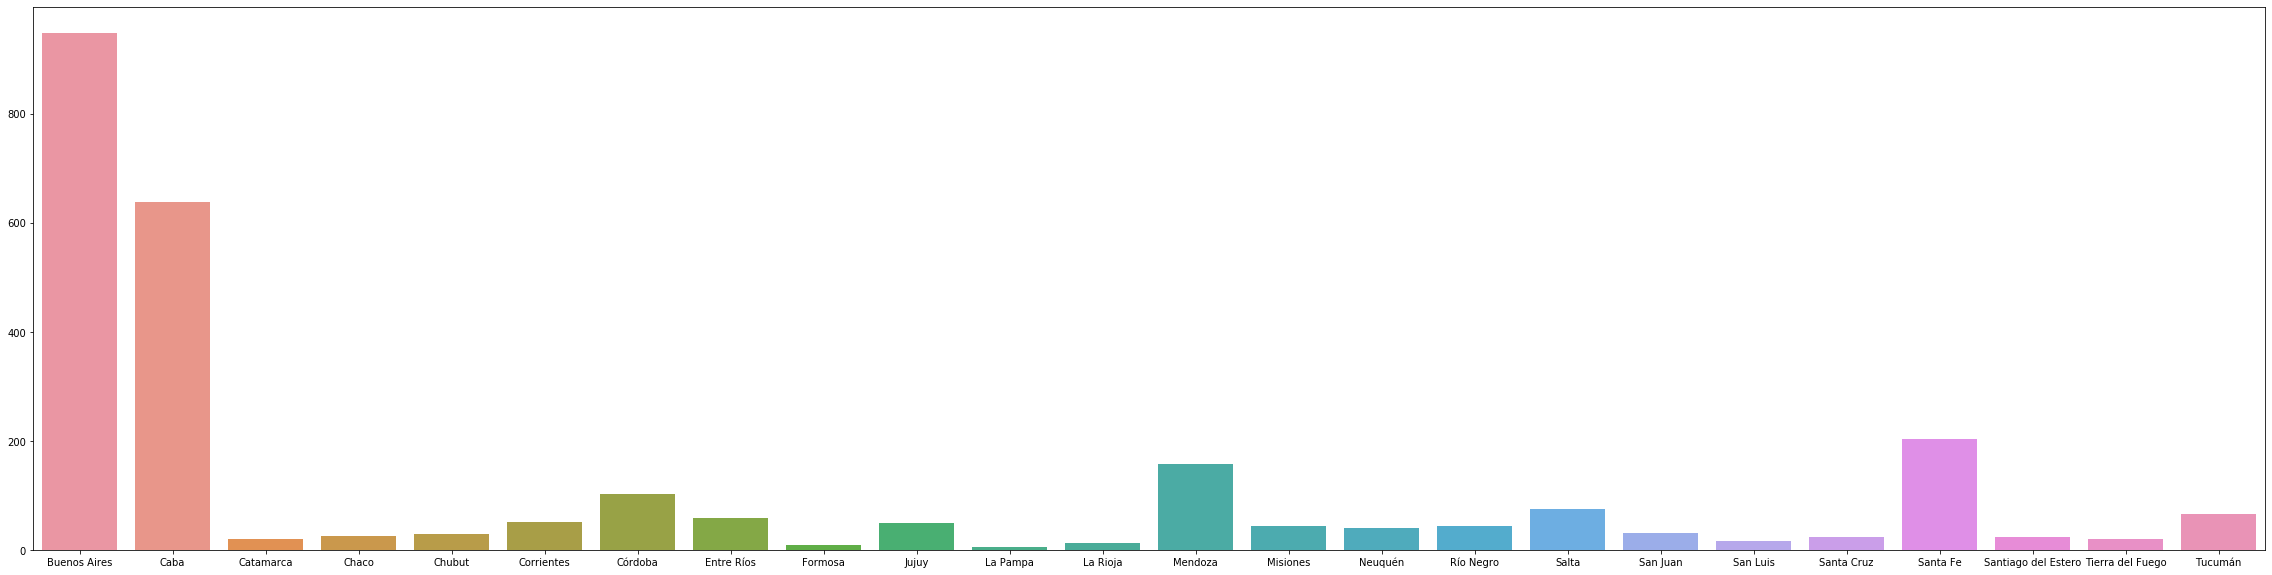

In [12]:
porProvincia_soloArg = porProvincia_soloArg.sort_index()
plt.figure(figsize=(40,10))
sns.barplot(x=porProvincia_soloArg.index,y=porProvincia_soloArg.values)

<h1>1.4. Denuncias por provincia ajustadas por población</h1>

In [13]:
dicc_poblacion_porprovincia = {"Caba":2890151,
"Buenos Aires":15625084,
"Catamarca": 367828,
"Chaco":1055259,
"Chubut": 509108,
"Córdoba":3308876,
"Corrientes":992595,
"Entre Ríos":1235994,
"Formosa":530162,
"Jujuy":673307,
"La Pampa":318951,
"La Rioja":333642,
"Mendoza":1738929,
"Misiones":1101593,
"Neuquén":551266,
"Río Negro":638645,
"Salta":1214441,
"San Juan":681055,
"San Luis":432310,
"Santa Cruz":273964,
"Santa Fe":3194537,
"Santiago del Estero":874006,
"Tierra del Fuego":127205,
"Tucumán":1448188,
}
provs_poblacion = pd.Series(dicc_poblacion_porprovincia).sort_index()
provs_poblacion = provs_poblacion.sort_index()


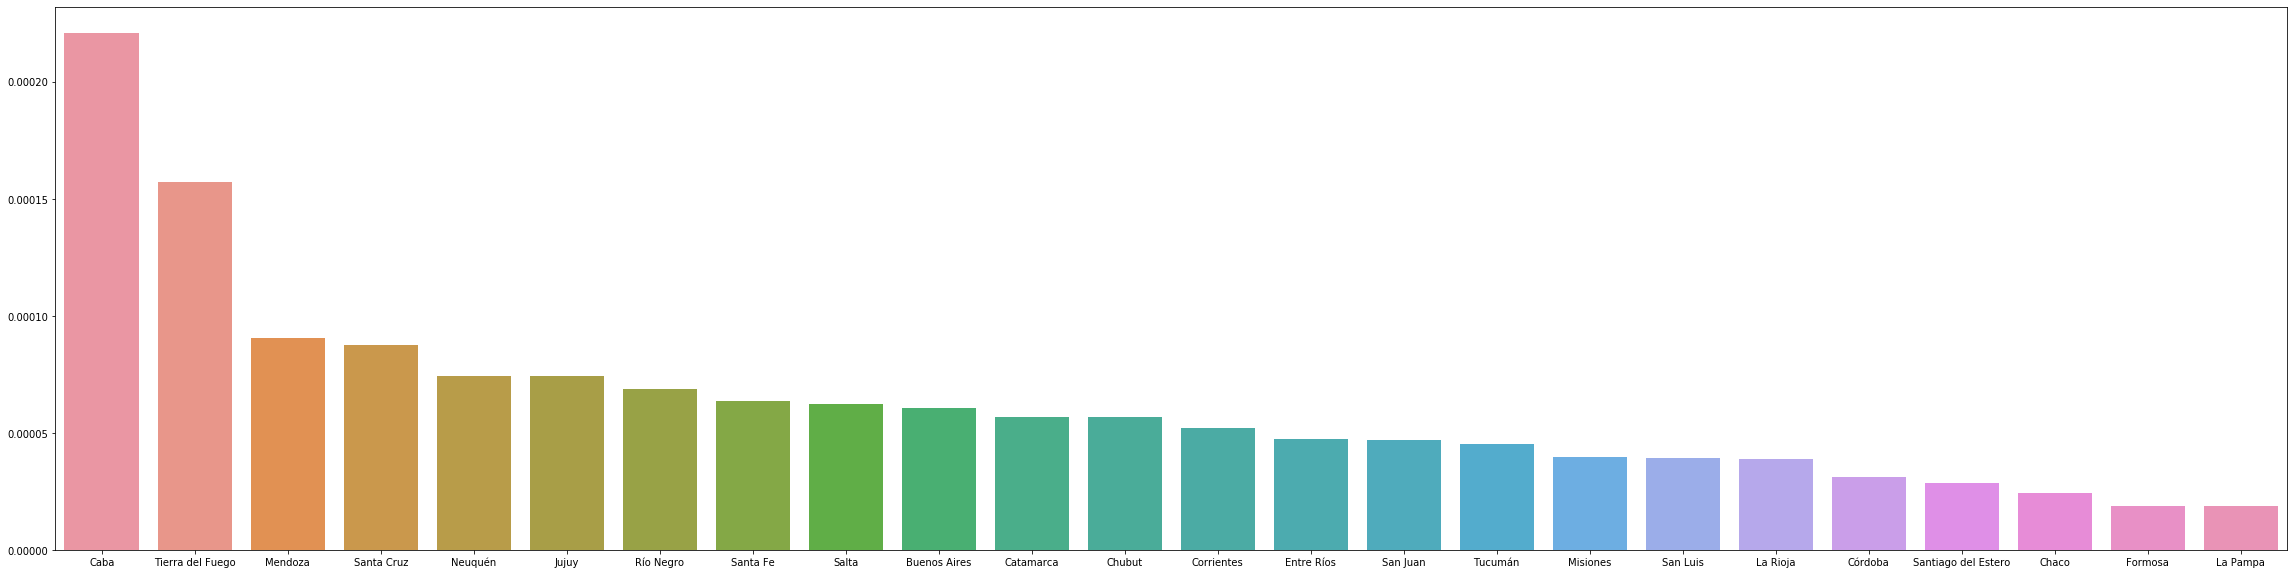

In [14]:
hechosypobl = pd.DataFrame([porProvincia_soloArg,provs_poblacion]).T

hechosypobl = hechosypobl.rename(columns={"Unnamed 0":"poblacion"})
hechosypobl
tasadenuncias_serie = hechosypobl.hecho_provincia/hechosypobl.poblacion
tasadenuncias_df = pd.DataFrame(tasadenuncias_serie).rename(columns={0:"Tasa de denuncias por población"})
tasadenuncias_df = tasadenuncias_df.sort_values(by="Tasa de denuncias por población", ascending=False)
tasadenuncias_df
plt.figure(figsize=(40,10))
sns.barplot(x=tasadenuncias_df.index,y=tasadenuncias_df["Tasa de denuncias por población"].values)

<h2>1.5. Denuncias por ciudad</h2>

Completar (datos muy mal escritos, arreglarlos)

<h1>2. Caracterización de las víctimas, los denunciantes y denunciados</h1>

<h2>2.1. Víctimas</h2>

<h3>2.1.1. Denuncias por edad de las víctimas</h3>

In [15]:
datos18["victima_rango_etario"] = datos18["victima_rango_etario"].replace('16 a 17 (específico para trabajo adolescente)',"16 a 17")

Text(0, 0.5, 'denuncias')

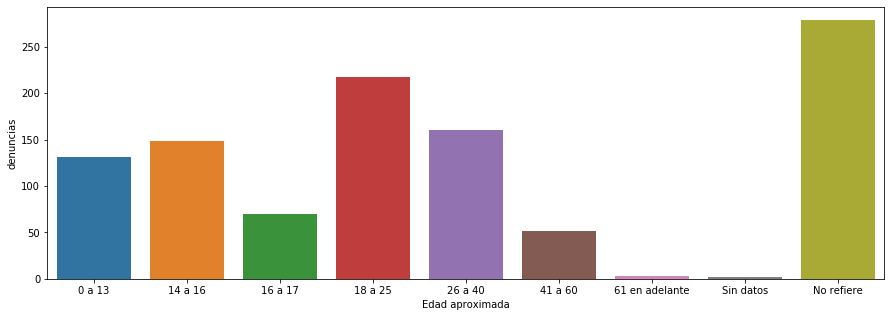

In [30]:
victima_poredad_ordered = pd.DataFrame(datos18["victima_rango_etario"].value_counts(), index = ['0 a 13', 
                                                                                                '14 a 16','16 a 17', 
                                                                                                '18 a 25','26 a 40','41 a 60',
       
         '61 en adelante', 'Sin datos','No refiere'],
      dtype='object')
victima_poredad_ordered = victima_poredad_ordered.rename_axis("Edad aproximada")
df_edades_2018 = victima_poredad_ordered.rename_axis(2018,axis="columns")

plt.figure(figsize=(15,5))
sns.barplot(y=df_edades_2018.iloc[:,0].values,x=df_edades_2018.index)
plt.ylabel("denuncias")


